In [61]:
import tensorflow as tf

In [62]:
import keras
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [63]:
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, #deletes the outer layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(180,180,3), #according to X_train however check instructions on the page before use
    pooling='avg', #not required but preferred
    classes=3,#according to yoour need
  
)
for layer in model_part1.layers:
    layer.trainable=False

In [64]:
from keras.layers import Flatten,Dense

In [65]:
model.add(model_part1)

In [66]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [68]:
fashion_mnist=keras.datasets.fashion_mnist

In [69]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [70]:
X_train.shape

(60000, 28, 28)

In [71]:
import cv2

In [72]:
img= cv2.cvtColor(X_train[0],cv2.COLOR_GRAY2RGB)

In [73]:
img.shape

(28, 28, 3)

In [91]:
X_test.shape

(10000, 28, 28)

In [97]:
test=np.zeros((60000,32,32,3),)

In [98]:
for i,fi in enumerate(X_test):
    img=cv2.resize(fi, (32,32), interpolation=cv2.INTER_AREA)
    img= cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    test[i] = img

In [95]:
test

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [77]:
img = np.random.randint(0, 255, (32, 32, 3))

In [78]:
img.shape

(32, 32, 3)

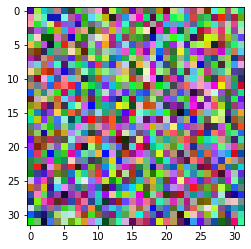

In [79]:
plt.imshow(img)

In [80]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [99]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 24,638,339
Trainable params: 1,050,627
Non-trainable params: 23,587,712
_________________________________________________________________


In [105]:
model.fit(test, Y_train,epochs=1/2,validation_split=0.1)

TypeError: Cannot convert 0.5 to EagerTensor of dtype int64